# Auction class

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# class Auction():
#     """This class creates Auction objects. So a given auction object will have info on the number of bidders
#     and the number of users in the game. You can call the .execute_rounds() method as many times as you want rounds  
#     in your auction"""
    
#     def __init__(self, users, bidders):
#         # I need to add a .balance instance attribute to the Bidder class
#         self.balances = {bidder:bidder.balance for bidder in bidders} 
#         self.bidders = bidders
#         self.users = users
    
#     def execute_round(self):
#         """This should execute all the steps within a single round of the game"""
        
#         user = np.random.randint(0, len(self.users)) # choose a user at random
        
#         bids = {}
#         # call bid for each bidder using the id of the chosen user
#         for bidder in self.bidders:
#             bid = bidder.bid(user)
#             bids[bidder] = bid
        
#         # loop through the bids dictionary to figure out the winning_bidder and the second_highest_bid
#         max_bid = 0            # only for the purpose of determining winning_bidder
#         second_highest_bid = 0 # starts at zero
#         for bidder,bid in bids.items():
#             if bid > max_bid:
#                 max_bid = bid
#                 winning_bidder = bidder     # set/update winning bidder
#             elif bid > second_highest_bid:
#                 second_highest_bid = bid    # update second_highest price
        
#         # show the ad to the user
#         ad_outcome = self.users[user].show_ad()
        
#         # loop through the bidders to notify each of them of the outcome of the auction round
#         for bidder in self.bidders:
#             # the winner also gets to find out the result of showing the add to the user
#             if bidder == winning_bidder:
#                 bidder.notify(True, second_highest_bid, ad_outcome) 
#             else:
#                 bidder.notify(False, second_highest_bid)
                
                
            
        
    
#     # optional
#     def plot_history(self):
#         """Create a visual representation of how the auction has proceeded"""
#         pass
    

In [ ]:
class Auction():
    """This class creates Auction objects. So a given auction object will have info on the number of bidders
    and the number of users in the game. You can call the .execute_rounds() method as many times as you want rounds  
    in your auction"""
    
    def __init__(self, users, bidders):
        self.bidders = bidders
        self.users = users
        self.balances = {bidder:0 for bidder in self.bidders} # finances will be completely handled in Auction class
        self.winning_prices = []
        self.wins_by_bidder = {bidder:0 for bidder in self.bidders} # keep track of how many wins each bidder has
        self.bids_by_user = {i:[0,0] for i in len(users)} # keep track of the average of EVERY bid by user
        self.winning_price_by_user = {i:[0,0]}            # keep track of the average of WINNING PRICE by user
        self.num_rounds = 0
        self.balances_by_round = {bidder:[0] for bidder in self.bidders}
    
    def execute_round(self):
        """This should execute all the steps within a single round of the game"""
        
        # choose a user at random
        user = np.random.randint(0, len(self.users)) 
        
        bids = {} # store the bids in a dictionary --> bidder is the key, their bid is the value
        # call bid for each bidder using the id of the chosen user
        for bidder in self.bidders:
            bid = bidder.bid(user)
            bids[bidder] = bid
        
        # loop through the bids dictionary to figure out the winning_bidder and the second_highest_bid
        max_bid = 0            # only for the purpose of determining winning_bidder
        second_highest_bid = 0 # starts at zero
        for bidder,bid in bids.items():
            if bid > max_bid:
                second_highest_bid = max_bid
                max_bid = bid
                winning_bidder = bidder     # set/update winning bidder
            elif bid > second_highest_bid:
                second_highest_bid = bid    # update second_highest price
            
        # show the ad to the user
        ad_outcome = self.users[user].show_ad()
        
        # loop through the bidders to notify each of them of the outcome of the auction round
        # also adjust their balances accordingly
        for bidder in self.bidders:
            # the winner also gets to find out the result of showing the add to the user
            if bidder == winning_bidder:
                bidder.notify(True, second_highest_bid, ad_outcome) 
                bidder.balances -= second_highest_bid
                if ad_outcome:
                    bidder.balances += 1
                self.wins_by_bidder[bidder] += 1 # just for diagnostics, not crucial
            else:
                bidder.notify(False, second_highest_bid)
        
        # following four blocks are just for diagnostics, not crucial
        bids_mean = np.mean([bid for bid in bids.values]) # take the average of the bids for this round
        # and update the instance attribute bids_by_user to update the average bid for them
        self.bids_by_user[user][0] = (self.bids_by_user[user][0] + bids_mean)/(self.bids_by_user[1] + 1)
        self.bids_by_user[user][1] += 1 # increment the number of rounds that they've been selected by 1
        
        # update the average of the winning prices for each user
        self.winning_price_by_bidder[user][0] = (self.winning_price_by_user[user][0] + second_highest_bid)/(self.winning_price_by_user[user][1] + 1)
        self.winning_price_by_user[user][1] += 1 # increment the number of rounds they've been selected by 1
        
        # update balances by round to see the history of the bidders balances over the course of the game
        for bidder in self.bidders: 
            self.balances_by_round[bidder].append(self.balances[bidder])
        
        # update num_rounds
        self.num_rounds += 1
                
                
    # optional
    def plot_history(self, info_type="balance_history"):
        """Create a visual representation of how the auction has proceeded. 
        info_type parameter determines what type of graph you are shown. Options are:
        balance_history
        wins_by_bidder
        winning_prices
        bids_by_user
        winning_price_by_user
        """
        
        if info_type == "balance_history":
            x = np.arange(self.num_rounds)
            # create several lists, each representing the history of each bidder's balance over the course of the game
            y = [[balance for balance in self.balances_by_round[bidder]] for bidder in self.bidders]
            for bidder in y:
                plt.plot(x,bidder)
            plt.legend(["bidder" + str(i) for i in range(len(y))])
            plt.xlabel("round")
            plt.ylabel("balance")
            plt.title("history of balances by user over the rounds")
            plt.show()
        
        elif info_type == "wins_by_bidder":
            x = ["bidder" + str(i) for i in len(self.bidders)]
            num_wins = [self.wins_by_bidder[bidder] for bidder in self.bidders]
            plt.bar(x, num_wins)
            plt.xlabel("bidder")
            plt.ylabel("wins")
            plt.title("Number of wins by bidder")
            plt.show()
            
        elif info_type == "winning_prices":
            x = np.arange(self.num_rounds)
            y = [winning_price for winning_price in self.winning_prices]
            plt.scatter(x,y)
            plt.xlabel("round number")
            plt.ylabel("price")
            plt.title("winning prices by rounds")
            plt.show()
            
        elif info_type == "bids_by_user":
            x = np.arange(len(self.users))
            y = [pair[0] for pair in self.bids_by_user.values()]
            plt.bar(x,y)
            plt.xlabel("user_id")
            plt.ylabel("bid amount")
            plt.title("average bid amount for each user")
            plt.show()
            
        elif info_type == "winning_price_by_user":
            x = np.arange(len(self.users))
            y = [pair[0] for pair in self.winning_price_by_user.values()]
            plt.bar(x,y)
            plt.xlabel("user_id")
            plt.ylabel("bid amount")
            plt.title("average of the winning bids in each round by user")
            plt.show()
        
    
    

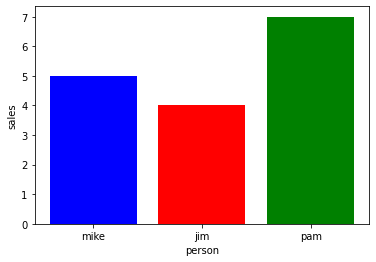

In [89]:
a = [5, 4, 7]
b = ["mike", "jim", "pam"]

plt.bar(b, a, color=["blue", "red", "green"])
plt.xlabel("person")
plt.ylabel("sales")
plt.show()

In [79]:
x = np.arange(0, 13)
y = [i**2 for i in x]
z = [i**3 for i in x]
w = [2**i for i in x]

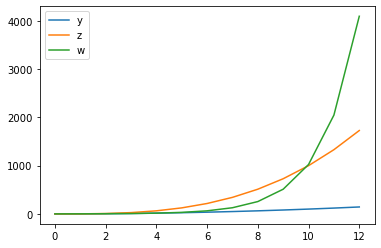

In [80]:
for target in [y,z,w]:
    plt.plot(x,target)
plt.legend(["y", "z", "w"])

# plt.plot(x,y)
# plt.plot(x,z)
# plt.plot(x,w)